In [114]:
import os
import cv2
import random
import numpy as np
from collections import Counter
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, SMOTENC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Activation, Flatten, Dropout, BatchNormalization, Conv2D, AveragePooling2D, Dense

(4, 2, 1, 3)


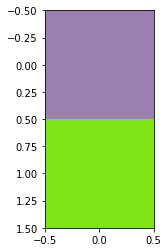

In [115]:
img = np.array([
    [[0.6,0.5,0.7]],
    [[0.5,0.9,0.1]]
])

img_arr = np.array([img, img, img, img])
print(img_arr.shape)
plt.imshow(img, cmap='gray')
plt.show()

In [113]:
print(img_arr)
print()

num, d1,d2, channels = img_arr.shape
print("num={}, d1={}, d2={}, channels={}".format(num, d1, d2, channels))
img_arr_flat = img_arr.reshape(num, d1*d2*channels)
print(img_arr_flat)
print()

# a.reshape(-1, 2).T.reshape(-1, 3, 4)
# img_arr_reshaped = img_arr_flat.reshape((channels,d2,d1,num)).transpose()
img_arr_reshaped = img_arr_flat.reshape(num, d1*d2*channels).reshape(num, d1, d2, channels)
# img_arr_reshaped = img_arr_flat.reshape(channels,d2,d1,num).reshape(channels,d2,d1,num)
print(img_arr_reshaped)

[[[[0.6 0.5 0.7]]

  [[0.5 0.9 0.1]]]


 [[[0.6 0.5 0.7]]

  [[0.5 0.9 0.1]]]


 [[[0.6 0.5 0.7]]

  [[0.5 0.9 0.1]]]


 [[[0.6 0.5 0.7]]

  [[0.5 0.9 0.1]]]]

num=4, d1=2, d2=1, channels=3
[[0.6 0.5 0.7 0.5 0.9 0.1]
 [0.6 0.5 0.7 0.5 0.9 0.1]
 [0.6 0.5 0.7 0.5 0.9 0.1]
 [0.6 0.5 0.7 0.5 0.9 0.1]]

[[[[0.6 0.5 0.7]]

  [[0.5 0.9 0.1]]]


 [[[0.6 0.5 0.7]]

  [[0.5 0.9 0.1]]]


 [[[0.6 0.5 0.7]]

  [[0.5 0.9 0.1]]]


 [[[0.6 0.5 0.7]]

  [[0.5 0.9 0.1]]]]


In [48]:
arr = np.array([0.25,0.25,0.25,0.25,0.25,0.25])
arr2d = arr[:, None]
print(arr2d)

[[0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]]


In [23]:
res = np.concatenate((concat, arr), 1)
print(res)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [151]:
img = np.array([
    [[0.6,0.5,0.7]],
    [[0.5,0.9,0.1]]
])
img_arr = np.array([img, img, img, img])
print(img_arr.shape)
num, d1,d2, channels = img_arr.shape
img_arr_flat = img_arr.reshape(num, d1*d2*channels)
print(img_arr_flat.shape)

columns_to_add = np.array([1,1,1,1])
print(columns_to_add.shape)

output = np.column_stack((img_arr_flat, columns_to_add))
print(output)

num = output.shape[0]
print(num)

(4, 2, 1, 3)
(4, 6)
(4,)
[[0.6 0.5 0.7 0.5 0.9 0.1 1. ]
 [0.6 0.5 0.7 0.5 0.9 0.1 1. ]
 [0.6 0.5 0.7 0.5 0.9 0.1 1. ]
 [0.6 0.5 0.7 0.5 0.9 0.1 1. ]]
4


In [132]:
x_img_new = output[:,:-4]
x_size_new = output[:,-4]
x_zone_new = output[:,-3:]

print(x_img_new)
print()
print(x_size_new)
print()
print(x_zone_new)

[[  1   2   3  10]
 [  4   5   6  40]
 [  7   8   9  70]
 [ 10  11  12 100]]

[[ 1]
 [ 4]
 [ 7]
 [10]]

[[2 3 4]
 [2 3 4]
 [2 3 4]
 [2 3 4]]
